# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def sigmoid(z):
  return 1 / (1+np.exp(-z))

In [3]:
def cost_function(y_true,y_pred):
  m = len(y_true)
  return -np.sum(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))

In [4]:
def gradient_descent(X,y,W,b,learning_rate):
  linear_pred = np.dot(X, W) + b
  predictions = sigmoid(linear_pred)
  dw = (1/X.shape[0]) * np.dot(X.T, (predictions - y))
  db = (1/X.shape[0]) * np.sum(predictions-y)

  W = W - learning_rate*dw
  b =b - learning_rate*db
  cost.append(cost_function(y, predictions))
  return W,b

In [5]:
def predict(W,b,X):
  linear_pred = np.dot(X, W) + b
  y_pred = sigmoid(linear_pred)
  class_pred = [0 if y<=0.5 else 1 for y in y_pred]
  return class_pred

In [6]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

In [7]:
def plot():
  x_decision_boundary = np.linspace(min(X.iloc[:, 0]), max(X.iloc[:, 0]), 100)
  y_decision_boundary = -(W[0] * x_decision_boundary + b) / W[1]

  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', label='Data points')
  plt.plot(x_decision_boundary, y_decision_boundary, label='Decision Boundary', color='red')
  plt.xlabel('Bill Length (mm)')
  plt.ylabel('Bill Depth (mm)')
  plt.title('Logistic Regression Decision Boundary')
  plt.legend()
  plt.show()

In [8]:
data = pd.read_csv('/content/drive/MyDrive/data/penguins.csv', index_col = 0)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male,2009
329,Chinstrap,Dream,43.5,18.1,202,3400,female,2009
330,Chinstrap,Dream,49.6,18.2,193,3775,male,2009
331,Chinstrap,Dream,50.8,19.0,210,4100,male,2009


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 23.4+ KB


In [10]:
data['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [11]:
data = data[data.species!='Chinstrap']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 264
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            265 non-null    object 
 1   island             265 non-null    object 
 2   bill_length_mm     265 non-null    float64
 3   bill_depth_mm      265 non-null    float64
 4   flipper_length_mm  265 non-null    int64  
 5   body_mass_g        265 non-null    int64  
 6   sex                265 non-null    object 
 7   year               265 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.6+ KB


array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

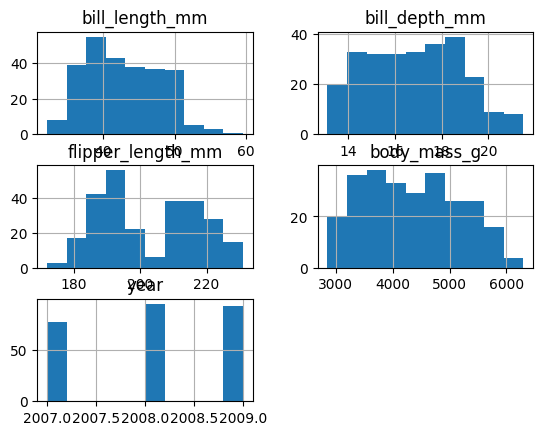

In [13]:
data.hist()

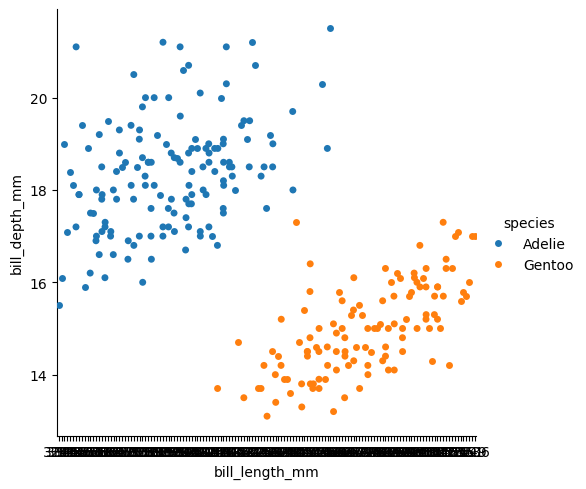

In [14]:
sns.catplot(data, x = 'bill_length_mm', y = 'bill_depth_mm', hue ='species')

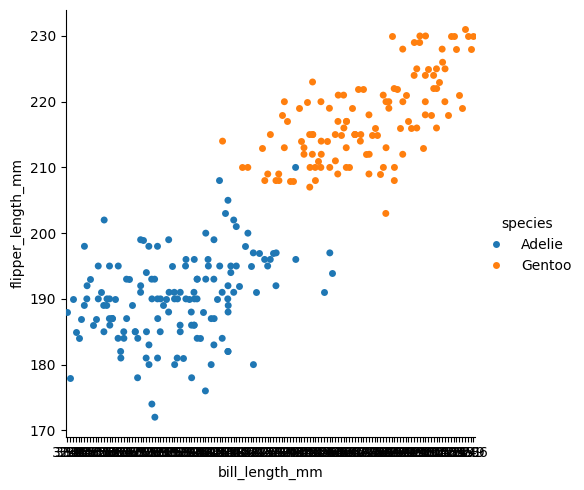

In [15]:
sns.catplot(data,x='bill_length_mm',y='flipper_length_mm',hue='species')

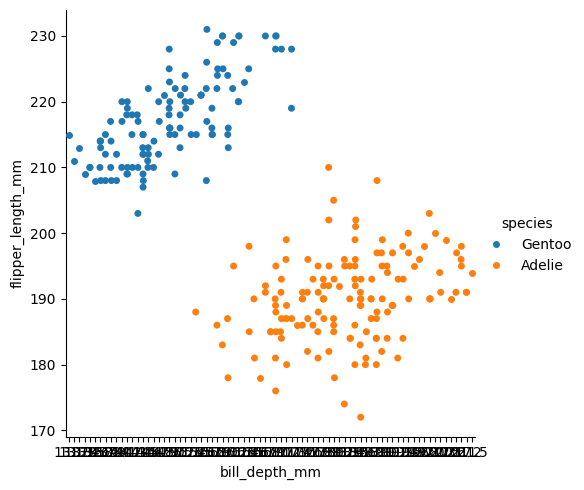

In [16]:
sns.catplot(data,x='bill_depth_mm',y='flipper_length_mm',hue='species')

Accuracy is: 0.5509433962264151


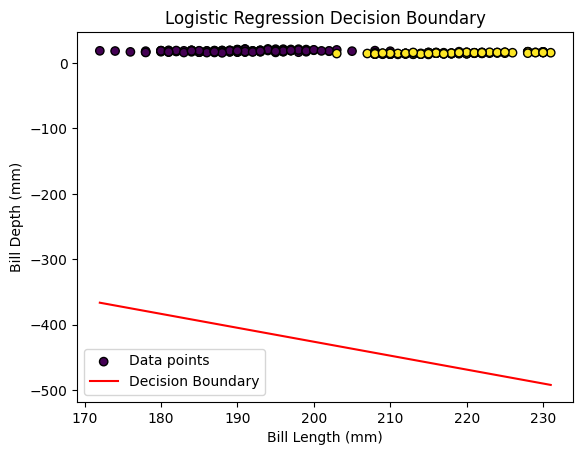

In [17]:
X = data[['flipper_length_mm','bill_depth_mm']]
y = data['species'].map({'Adelie': 0, 'Gentoo': 1})

n_samples, n_features = X.shape

W=np.zeros(n_features)
b=0

cost=[]
# Training logistic regression model
learning_rate = 0.0001
epochs = 10000

for epoch in range(epochs):
  W,b = gradient_descent(X,y,W,b,learning_rate)
  y_pred=predict(W,b,X)

  if (epoch % 10000 ==0):
    print('Accuracy is:',accuracy(y_pred, y))
    plot()

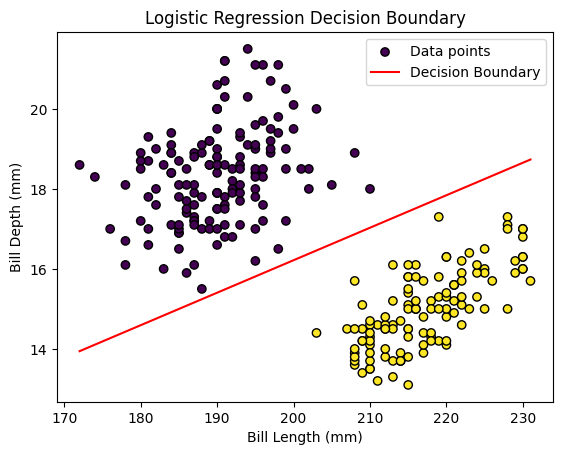

In [18]:
plot()

# Scikit Learn Implementation

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
model.score(X_train,y_train)

1.0

In [24]:
model.score(X_test,y_test)

1.0

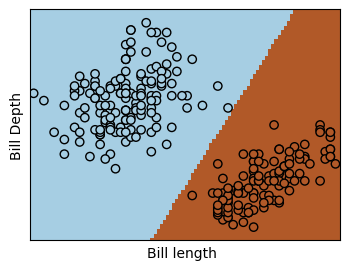

In [25]:
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Bill length ",
    ylabel="Bill Depth",
    eps=0.5,
)


plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

In [26]:
W=np.zeros(n_features)
b=0

cost=[]
# Training logistic regression model
learning_rate = 0.001
epochs = 10000

for epoch in range(epochs):
  W,b = gradient_descent(X_train,y_train,W,b,learning_rate)
  # y_pred=predict(W,b,X)

  # if (epoch % 100 ==0):
  #   print('Accuracy is:',accuracy(y_pred, y))
  #   plot()

In [27]:
y_pred = predict(W, b, X_test)

In [28]:
y_pred

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0]

In [29]:
print("Accuracy : ", accuracy(y_pred, y_test))


Accuracy :  1.0
